<a href="https://colab.research.google.com/github/hernanmartinezrivero/machine_learning/blob/main/ejercicio01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Analysis and Visualization

---
##Exercise 1
Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 100000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

---


In [ ]:
import io
import numpy
import pandas as pd
import seaborn

**Cargar el dataframe desde un .csv y asignarno a un pandas**

In [ ]:
url = 'https://raw.githubusercontent.com/DiploDatos/AnalisisyVisualizacion/master/sysarmy_survey_2023_processed.csv'
df = pd.read_csv(url)

**Mostrar las primeras 5 filas del dataframe de pandas**

In [ ]:
pd.options.display.max_columns = None
df.head()

,work_country,work_province,work_dedication,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_last_dollar_value,salary_has_bonus,salary_bonus_tied_to,salary_inflation_adjustment,salary_percentage_inflation_adjustment,¿En qué mes fue el último ajuste?,salary_comparison_last_semester,¿Contás con beneficios adicionales?,salary_satisfaction,Trabajo de,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,tools_platform,tools_programming_languages,tools_frameworks,tools_data_bases,tools_qa_testing,company_employee_number,work_work_modality,Si trabajás bajo un esquema híbrido ¿Cuántos días a la semana vas a la oficina?,company_recommended,"¿Qué tanto estás usando Copilot, ChatGPT u otras herramientas de IA para tu trabajo?",¿Salir o seguir contestando?,profile_studies_level,profile_studies_level_state,profile_career,Institución educativa,¿Salir o seguir contestando sobre las guardias?,work_on_call_duty,salary_on_call_duty_charge,Aclará el número que ingresaste en el campo anterior,¿Salir o seguir contestando sobre estudios?,profile_age,profile_gender
0,Argentina,Catamarca,Full-Time,Staff (planta permanente),680000.0,520000.0,NaN,NaN,No,No recibo bono,Uno,26.0,Abril,2,"Abono de Internet, Clases de idiomas, Crédito ...",2,Infosec,10.0,1.0,1.0,0,"Amazon Web Services, Linux","Bash/Shell, Python",Angular,Ninguna de las anteriores,Ninguna de las anteriores,De 201 a 500 personas,100% remoto,0,5,0,Terminar encuesta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,Varón Cis
1,Argentina,Catamarca,Full-Time,Staff (planta permanente),650000.0,520000.0,NaN,NaN,No,No recibo bono,Dos,24.0,Mayo,2,Ninguna de las anteriores,3,DevOps Engineer,23.0,2.0,2.0,4,"Docker, Kubernetes, Linux, VMWare, Windows Server","Bash/Shell, CSS, HTML, Javascript, PHP, SQL, T...","Angular, Bootstrap, jQuery, Laravel, Node.js","MariaDB, Microsoft SQL Server, MongoDB, MySQL,...","PHPUnit, Postman",De 201 a 500 personas,100% presencial,0,4,1,Responder sobre mis estudios,Maestría,Completo,Licenciatura en Sistemas de Información,Universidad Siglo 21,Terminar encuesta,NaN,NaN,NaN,NaN,45,Varón Cis
2,Argentina,Catamarca,Full-Time,Staff (planta permanente),125000.0,104000.0,NaN,NaN,No,No recibo bono,No,0.0,No tuve,3,"Abono de Internet, Capacitaciones y/o cursos,",3,Developer,0.0,0.0,0.0,0,Ninguna de las anteriores,"SQL, Oracle APEX, PL-SQL, SQL Developer",Ninguno de los anteriores,Oracle,Ninguna de las anteriores,De 11 a 50 personas,100% remoto,0,10,3,Terminar encuesta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,Mujer Cis
3,Argentina,Chaco,Part-Time,Staff (planta permanente),190000.0,240000.0,NaN,NaN,No,No recibo bono,Dos,11.0,Mayo,1,"Capacitaciones y/o cursos, Descuento en gimnas...",2,Business Analyst,2.0,2.0,0.0,0,"Azure, SAP, CRM",ABAP,Ninguno de los anteriores,"Microsoft Azure (Tables, CosmosDB, SQL, etc)",Ninguna de las anteriores,De 501 a 1000 personas,Híbrido (presencial y remoto),1,7,3,Terminar encuesta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,Mujer Cis
4,Argentina,Chaco,Full-Time,Tercerizado (trabajo a través de consultora o ...,250000.0,207000.0,NaN,NaN,No,No recibo bono,Dos,60.0,Mayo,1,Ninguna de las anteriores,1,QA / Tester,3.0,0.0,0.0,1,"Docker, Linux",Java,Lippia,Ninguna de las anteriores,"Appium, Cucumber, Lippia, Selenium",De 51 a 100 personas,100% remoto,0,7,2,Terminar encuesta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,Varón Cis


#Preliminary Data Exploration and Data Cleaning
Now that we've got our data loaded into our dataframe, we need to take a closer look at it to help us understand what it is we are working with. This is always the first step with any data science project. Let's see if we can answer the following questions:

*  How many rows does our dataframe have?

* How many columns does it have?

* What are the labels for the columns? Do the columns have names?

* Are there any missing values in our dataframe? Does our dataframe contain any bad data?



In [ ]:
df.shape # To see the number of rows and columns

(5805, 43)

We can access the column names directly with the columns attribute.

In [ ]:
df.columns

Index(['work_country', 'work_province', 'work_dedication',
       'work_contract_type', 'salary_monthly_BRUTO', 'salary_monthly_NETO',
       'salary_in_usd', 'salary_last_dollar_value', 'salary_has_bonus',
       'salary_bonus_tied_to', 'salary_inflation_adjustment',
       'salary_percentage_inflation_adjustment',
       '¿En qué mes fue el último ajuste?', 'salary_comparison_last_semester',
       '¿Contás con beneficios adicionales?', 'salary_satisfaction',
       'Trabajo de', 'profile_years_experience', 'work_years_in_company',
       'work_years_in_current_position', 'work_people_in_charge_of',
       'tools_platform', 'tools_programming_languages', 'tools_frameworks',
       'tools_data_bases', 'tools_qa_testing', 'company_employee_number',
       'work_work_modality',
       'Si trabajás bajo un esquema híbrido ¿Cuántos días a la semana vas a la oficina?',
       'company_recommended',
       '¿Qué tanto estás usando Copilot, ChatGPT u otras herramientas de IA para tu trabajo?

## Missing values and Junk Data
Before we can proceed with our analysis we should try and figure out if there are any missing or junk data in our dataframe. That way we can avoid problems later on. In this case, we're going to look for NaN (Not A Number) values in our dataframe. NAN values are blank cells or cells that contain strings instead of numbers. Use the .isna() method and see if you can spot if there's a problem somewhere.

In [ ]:
df.isna()

,work_country,work_province,work_dedication,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_last_dollar_value,salary_has_bonus,salary_bonus_tied_to,salary_inflation_adjustment,salary_percentage_inflation_adjustment,¿En qué mes fue el último ajuste?,salary_comparison_last_semester,¿Contás con beneficios adicionales?,salary_satisfaction,Trabajo de,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,tools_platform,tools_programming_languages,tools_frameworks,tools_data_bases,tools_qa_testing,company_employee_number,work_work_modality,Si trabajás bajo un esquema híbrido ¿Cuántos días a la semana vas a la oficina?,company_recommended,"¿Qué tanto estás usando Copilot, ChatGPT u otras herramientas de IA para tu trabajo?",profile_studies_level,profile_studies_level_state,profile_career,Institución educativa,work_on_call_duty,salary_on_call_duty_charge,Aclará el número que ingresaste en el campo anterior,profile_age,profile_gender
0,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,False,False
1,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False
2,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,False,False
3,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,False,False
4,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5800,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False
5801,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,False,False
5802,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,False,False
5803,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,False,False


To remove the unwanted columns, we simply provide a list of the column names ['Salir o seguir contestando?', ‘¿Salir o seguir contestando sobre las guardias?', '¿Salir o seguir contestando sobre estudios?'] to the .drop() method. By setting axis=1 we are specifying that we want to drop certain columns.

In [ ]:
df.drop(['¿Salir o seguir contestando?', '¿Salir o seguir contestando sobre las guardias?', '¿Salir o seguir contestando sobre estudios?'], axis=1, inplace=True)
df.head()

#Accessing Columns and Individual Cells in a Dataframe
To access a particular column from a data frame we can use the square bracket notation, like so:

In [ ]:
df['salary_monthly_NETO']

0        520000.0
1        520000.0
2        104000.0
3        240000.0
4        207000.0
          ...    
5800     275000.0
5801     470000.0
5802    1150000.0
5803     525000.0
5804     160000.0
Name: salary_monthly_NETO, Length: 5805, dtype: float64

We can define a list of relevant columns for our analysis

In [ ]:
relevant_columns = ['tools_programming_languages', 'salary_monthly_NETO']

To find the highest starting salary we can simply chain the .max() method.

In [ ]:
highest_salary = df['salary_monthly_NETO'].max()
print('The highest "neto" salary is', highest_salary)

The highest "neto" salary is 45000000.0


But which languages knowledge earns this much on average? For this, we need to know the row number or index so that we can look up the name of the major. Lucky for us, the .idxmax() method will give us index for the row with the largest value.

In [ ]:
df['salary_monthly_NETO'].idxmax()

5454

To see the languages that corresponds to that particular row, we can use the .loc (location) property.

In [ ]:
highest_salary_languages = df['tools_programming_languages'].loc[5454]
print('The person who have the highest salary konws', highest_salary_languages)

The person who have the highest salary konws Bash/Shell, Go, Python, SQL


Here we are selecting both a column ('salary_monthly_NETO') and a row at index 5454, so we are retrieving the value of a particular cell. You might see people using the double square brackets notation to achieve exactly the same thing:

In [ ]:
df['tools_programming_languages'][5454]

'Bash/Shell, Go, Python, SQL'

If you don't specify a particular column you can use the .loc property to retrieve an entire row:

In [ ]:
df.loc[5454]

In order to look at the number of mentions by programming language, we need to convert the comma-separated string of languages to a list of string.

In [ ]:
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')

  # Split string into a list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '') for lang in languages_str.split()]

# Create a new column with the list of languages
df.loc[:, 'cured_programming_languages'] = df.tools_programming_languages\
  .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages')

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = df.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df[relevant_columns])\
    .rename(columns={0: 'programming_language'})

df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,cured_programming_languages
0,bash/shell,"Bash/Shell, Python",520000.0,"[bash/shell, python]"
0,python,"Bash/Shell, Python",520000.0,"[bash/shell, python]"
1,bash/shell,"Bash/Shell, CSS, HTML, Javascript, PHP, SQL, T...",520000.0,"[bash/shell, css, html, javascript, php, sql, ..."
1,css,"Bash/Shell, CSS, HTML, Javascript, PHP, SQL, T...",520000.0,"[bash/shell, css, html, javascript, php, sql, ..."
1,html,"Bash/Shell, CSS, HTML, Javascript, PHP, SQL, T...",520000.0,"[bash/shell, css, html, javascript, php, sql, ..."


So we have new a column  wich contains only one programming language and now we want to count the frecuency for each one.



In [ ]:
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
language_count[:15]

,frequency,count
0,sql,2508
1,javascript,2282
2,html,1643
3,python,1623
4,css,1109
5,java,1075
6,typescript,1061
7,bash/shell,898
8,.net,688
9,php,668


To see how many differents languages we have, we cant use .unique() method

In [ ]:
language_count.frequency.unique()

array(['sql', 'javascript', 'html', 'python', 'css', 'java', 'typescript',
       'bash/shell', '.net', 'php', 'c#', 'go', 'vba', 'c++', 'kotlin',
       'c', 'groovy', 'r', 'ruby', 'arduino', 'scala', 'cobol', 'swift',
       'abap', 'dart', 'perl', 'rust', 'powershell', 'solidity', 'delphi',
       'objective-c', 'smalltalk', 'apex', 'elixir', 'matlab', 'genexus',
       '', 'terraform', 'assembler', 'no', 'de', 'dax', 'ansible',
       'oracle', 'clojure', 'pl/sql', 'salesforce', 'visual', 'bash',
       'erlang', 'rpg', 'y', 'ninguna', 'foxpro', 'power', 'plsql', 'xml',
       'sas', 'al', 'react', 'mi', '.', 'x++', 'vb6', 'stata', 'powerbi',
       'bi', 'utilizamos', 'actionscript', 'rpgle', 'ninguno', 'm',
       'engine', 'progress', 'mulesoft', 'hcl', 'cli', 'developer',
       'solo', 'figma', '-', 'lenguajes', 'asp', 'aplica', 'esql', 'pl',
       'ibm', 'edwards', 'kusto', 'programo', 'jd', 'lua', 'a', 'gosu',
       'puesto', 'mikrotik', 'vlocity', 'pascal', 'comunicacione

And if we want to know how many they are:

In [ ]:
len(language_count.frequency.unique())

253

If we check the tail of our sorted list, we can see that many of these "programming languages" have non-relevant numbers of occurrences.
Also, we previously saw that many of them are not even programming languages.

In [ ]:
language_count.tail(200)

,frequency,count
53,foxpro,4
54,power,4
55,plsql,4
56,xml,4
57,sas,3
...,...,...
248,fi,1
249,entornos,1
250,webs,1
251,consola,1


In [ ]:
language_count.drop(language_count.tail(238).index,inplace=True)

In [ ]:
plt.figure(figsize=(18,5))
seaborn.countplot(x=df_lang.programming_language, color ='blue' )
plt.tick_params(labelrotation=90)

NameError: name 'plt' is not defined

La media de lo que cobra alguien que program en:
- pytohn
- java
- ???

**Con cuáles nos quedamos?**
- El top 10 de los más mencionados
- Todos los que tuvieron x o más menciones

**Son todos lenguajes de programación?**

- Quitamos los que no lo sean? Cuál es el criterio?
- Podemos identificar si alguna dupla se repite?

**Agregamos un set de gráficos que muestren la distribución de los salarios para X lenguaje**


# Data Visualization
To create our first charts we're going to use a library called Matplotlib and another one called Seaborn.

First, we have to import them.

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn

You can actually show a line chart for the popularity of a programming language using only a single line of code.

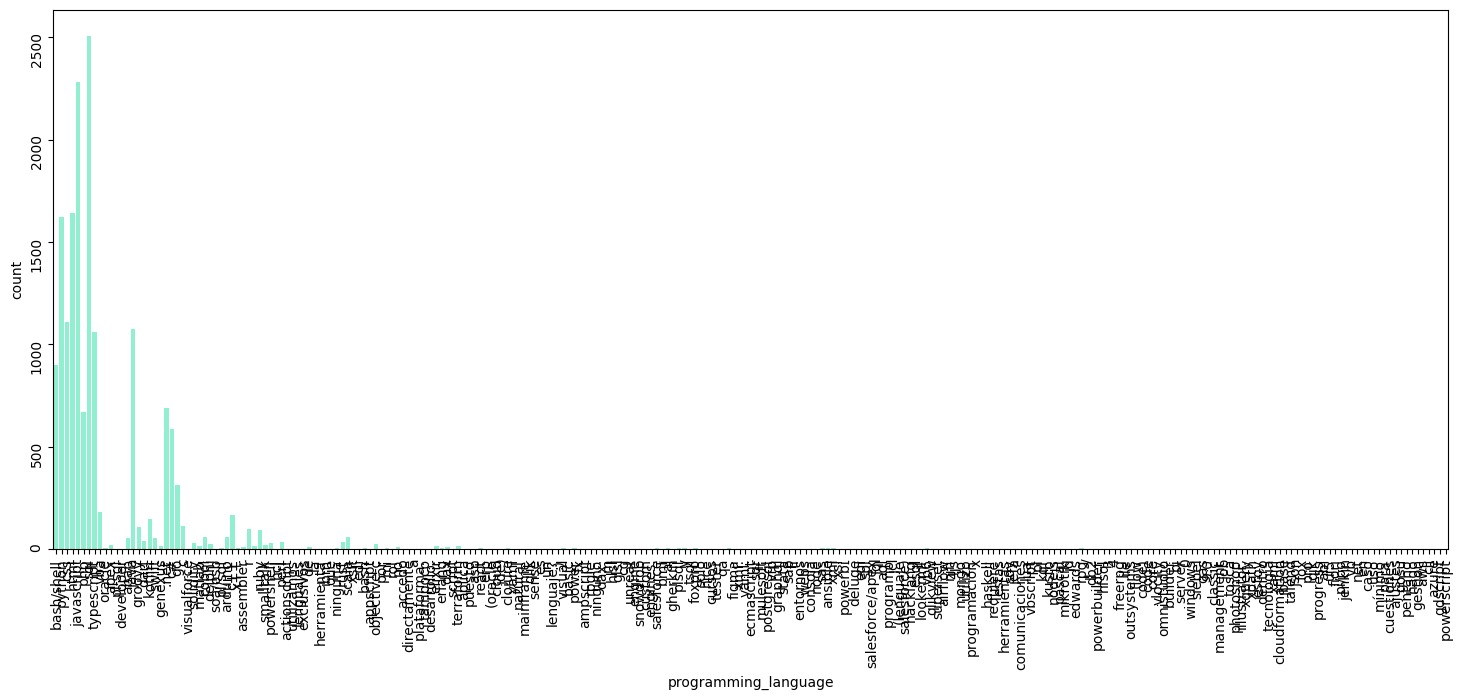

In [ ]:
plt.figure(figsize=(18,7))
seaborn.countplot(x=df_lang.programming_language, color ='aquamarine' )
plt.tick_params(labelrotation=90)